## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud

In [ ]:
!pip3 install tensorflow

In [ ]:
from keras.preprocessing.text import Tokenizer
# handle the constant text length
from keras.utils.data_utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM, Conv1D, MaxPool1D
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

### **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
true_data = pd.read_csv('/content/drive/MyDrive/Fake_News_Kaggle/True.csv')
fake_data = pd.read_csv('/content/drive/MyDrive/Fake_News_Kaggle/Fake.csv')

In [ ]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
true_data.shape
fake_data.shape

(23481, 4)

In [ ]:
fake_data['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

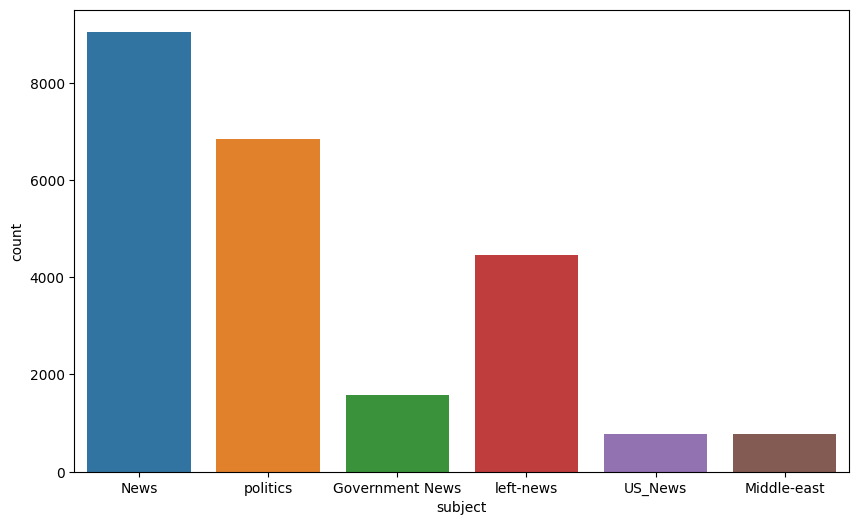

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'subject', data=fake_data)

In [ ]:
true_data['label'] = 1;
true_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
fake_data['label'] = 0;
fake_data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


**Explore Fake News Data**

In [ ]:
fake_data['text'].tolist()

['Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t e

In [ ]:
text = ' '.join(fake_data['text'].tolist())

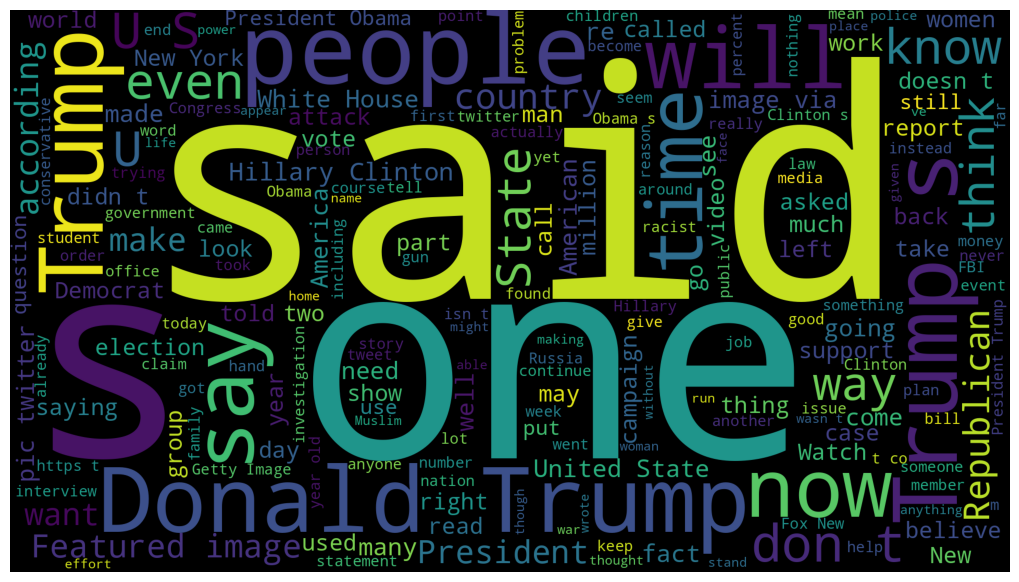

In [ ]:
wordcloud = WordCloud(width = 1920, height = 1080).generate(text)
fig = plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Explore Real News Data**

In [ ]:
true_text = ' '.join(true_data['text'].tolist())

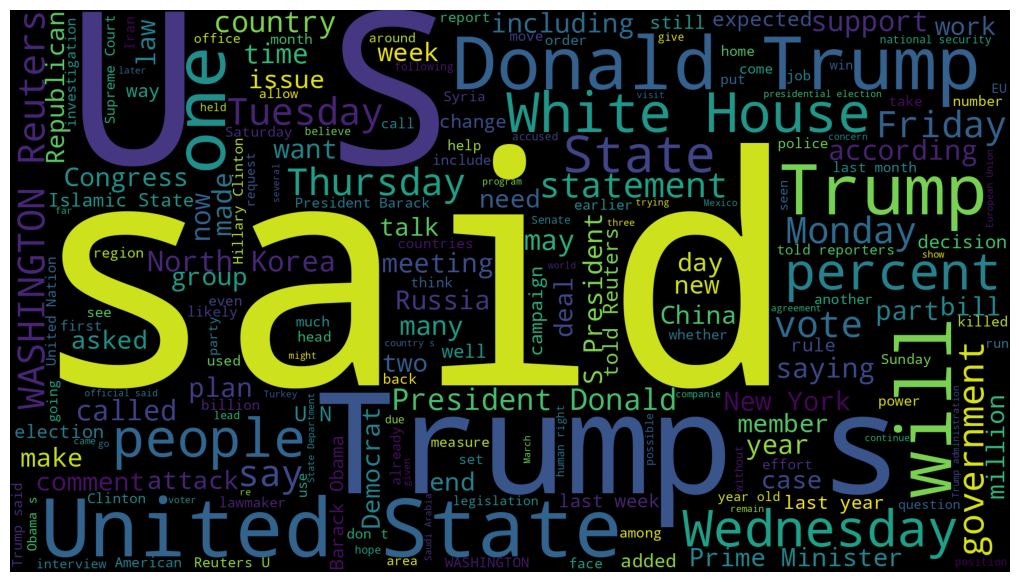

In [ ]:
wordcloud = WordCloud(width = 1920, height = 1080).generate(true_text)
fig = plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Comparison of two wordcloud**

1. True news are mostly taken from "Washington Reuters"
2. Most of the tweets are from twitter - if it's tweets then text should be 259 characters
3. And few articles without any publication information - unknown publisher

In [ ]:
true_data.sample(5)

,title,text,subject,date,label
478,White House does not expect U.S. government sh...,ABOARD AIR FORCE ONE (Reuters) - The White Hou...,politicsNews,"November 29, 2017",1
1413,"Senate panel to hold hearing on Yahoo, Equifax...",WASHINGTON (Reuters) - The chairman of the U.S...,politicsNews,"October 3, 2017",1
13273,Mali's president contradicts French account of...,PARIS (Reuters) - Malian soldiers killed by a ...,worldnews,"December 3, 2017",1
2785,New Senate healthcare plan keeps Obamacare-era...,WASHINGTON (Reuters) - The revised U.S. Senate...,politicsNews,"July 13, 2017",1
8011,A modest bump for Clinton in online wagering h...,NEW YORK (Reuters) - Democratic presidential n...,politicsNews,"September 27, 2016",1


**Cleaning data**

In [ ]:
spam_publisher = []
for index, row in enumerate(true_data.text.values):
  try:
    record = row.split(' - ', maxsplit=1)
    record[1]
    assert(len(record[0])<120)
  except:
    spam_publisher.append(index)

In [ ]:
len(spam_publisher)

229

In [ ]:
true_data.iloc[spam_publisher].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 229, dtype: object

In [ ]:
reputed_publisher = []
tmp_text = []

for index, row in enumerate(true_data.text.values):
  if index in spam_publisher:
    tmp_text.append(row)
    reputed_publisher.append('unknown')
  else:
    record = row.split('-',maxsplit=1)
    reputed_publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())


In [ ]:
true_data['publisher'] = reputed_publisher
true_data['text'] = tmp_text

In [ ]:
true_data.head()

,title,text,subject,date,label,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",1,WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",1,WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",1,WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",1,WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",1,SEATTLE/WASHINGTON (Reuters)


In [ ]:
true_data.shape

(21417, 6)

In [ ]:
empty_fake_index = [index for index,text in enumerate(fake_data.text.tolist()) if str(text).strip()==""]

In [ ]:
fake_data.iloc[empty_fake_index]

,title,text,subject,date,label
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",0
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",0
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",0
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017",0
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017",0
...,...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015",0
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",0
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",0
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",0


In [ ]:
true_data['text'] = true_data['title'] + " " + true_data['text']
fake_data['text'] = fake_data['title'] + " " + fake_data['text']

In [ ]:
true_data['text'] = true_data['text'].apply(lambda x: str(x).lower())
fake_data['text'] = fake_data['text'].apply(lambda x: str(x).lower())

In [ ]:
true_data = true_data[['text','label']]
true_data.head()

,text,label
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1


In [ ]:
fake_data = fake_data[['text','label']]
fake_data.head()

,text,label
0,donald trump sends out embarrassing new year’...,0
1,drunk bragging trump staffer started russian ...,0
2,sheriff david clarke becomes an internet joke...,0
3,trump is so obsessed he even has obama’s name...,0
4,pope francis just called out donald trump dur...,0


In [ ]:
news_data = true_data.append(fake_data,ignore_index=True)
news_data.sample(5)

<ipython-input-32-68a1e9ec5b96>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news_data = true_data.append(fake_data,ignore_index=True)


,text,label
9710,obama says chinese-led trade deal shows need f...,1
28325,beatles drummer ringo starr will not perform ...,0
20949,egypt says suspended u.s. military exercises t...,1
974,"two ex-trump aides charged in russia probe, th...",1
38093,watch: news cameras catch drug smugglers scale...,0


## **Preprocessing Data**

In [ ]:
news_data['text'] = news_data['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

### **Vectorization ( Technique to convert text into numerical value )**

In [ ]:
import gensim

In [ ]:
y = news_data['label'].values

In [ ]:
X = [d.split() for d in news_data['text'].tolist()]

In [ ]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [ ]:
DIM = 100
w2vModel = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1)

In [ ]:
len(w2vModel.wv)

230798

In [ ]:
# Correlated words with each other
w2vModel.wv.most_similar('uk')

[('britain', 0.7251684069633484),
 ('british', 0.7104137539863586),
 ('eu', 0.6371620893478394),
 ('brussels', 0.6223858594894409),
 ('britains', 0.6137564778327942),
 ('brexit', 0.5744438171386719),
 ('european', 0.5730277895927429),
 ('eus', 0.5697058439254761),
 ('europe', 0.5574051141738892),
 ('europes', 0.5534268021583557)]

In [ ]:
w2vModel.wv['trump']

array([-2.8068855 ,  1.2792195 , -2.4120038 ,  1.1030955 , -1.9600549 ,
       -1.1159612 , -1.3307694 , -5.10086   ,  2.3501694 ,  2.4628003 ,
        3.118616  ,  0.27959004, -2.090399  , -3.9980035 ,  4.383757  ,
        8.134058  ,  4.364632  ,  3.053745  ,  1.3581219 ,  1.4616547 ,
        0.9233638 ,  2.80018   , -1.8797222 ,  3.7960086 , -0.55679595,
        5.681773  , -0.37859568, -4.4654274 ,  0.37700507, -1.2516674 ,
        2.8432922 , -0.27976084,  2.4380298 , -2.7502658 ,  2.5301704 ,
        0.652683  , -3.8908262 , -1.8032125 , -2.0322232 , -1.3053335 ,
       -0.4442963 , -1.8316664 , -0.44088316, -0.46793208, -7.9613543 ,
        3.225807  , -2.0702763 , -0.8628077 ,  4.3454003 , -1.5444772 ,
       -1.7551955 ,  1.6776669 ,  0.7899469 ,  2.8558266 , -2.138594  ,
       -1.798695  , -0.33270586,  0.1025031 , -1.9508768 , -2.4966571 ,
       -4.0467887 ,  0.93452483,  0.1637366 ,  1.7980496 , -0.82381546,
        0.56415874, -2.7731524 ,  0.57162553,  0.12506282,  2.07

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
# each words to sequential numbers 1,2,3..
X = tokenizer.texts_to_sequences(X)

In [ ]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

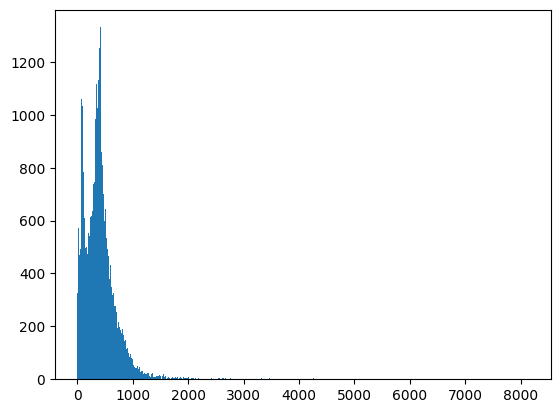

In [ ]:
plt.hist([len(x) for x in X],bins=700)
plt.show()

In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1587

In [ ]:
maxlen = 1000
X = pad_sequences(X,maxlen = maxlen)

In [ ]:
len(X[100])

1000

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix


In [ ]:
embedding_vector = get_weight_matrix(w2vModel)

In [ ]:
# Embeddings make it easier to do machine learning on large inputs like sparse vectors representing words.
# Ideally, an embedding captures some of the semantics of the input by placing semantically similar inputs
# close together in the embedding space. An embedding can be learned and reused across models.
embedding_vector.shape

(230799, 100)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,output_dim=DIM, weights = [embedding_vector], input_length= maxlen, trainable= False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23079900  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,197,277
Trainable params: 117,377
Non-trainable params: 23,079,900
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
history  = model.fit(X_train, y_train, validation_split=0.2, epochs=5)

Epoch 1/5
842/842 [==============================] - 1432s 2s/step - loss: 0.1332 - acc: 0.9522 - val_loss: 0.0667 - val_acc: 0.9774
Epoch 2/5
842/842 [==============================] - 1424s 2s/step - loss: 0.0480 - acc: 0.9838 - val_loss: 0.0455 - val_acc: 0.9850
Epoch 3/5
842/842 [==============================] - 1426s 2s/step - loss: 0.0349 - acc: 0.9882 - val_loss: 0.0351 - val_acc: 0.9890
Epoch 4/5
842/842 [==============================] - 1425s 2s/step - loss: 0.0215 - acc: 0.9938 - val_loss: 0.0298 - val_acc: 0.9909
Epoch 5/5
842/842 [==============================] - 1366s 2s/step - loss: 0.0167 - acc: 0.9947 - val_loss: 0.0367 - val_acc: 0.9866


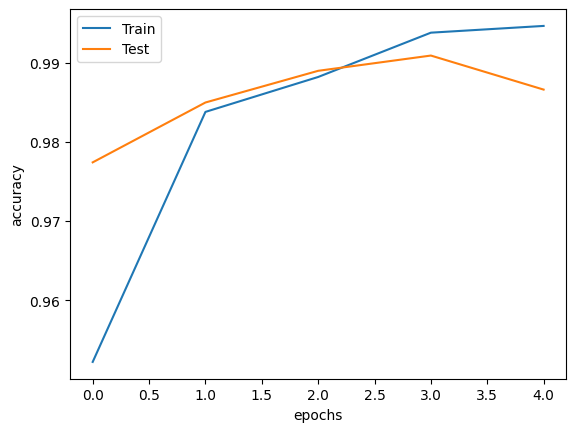

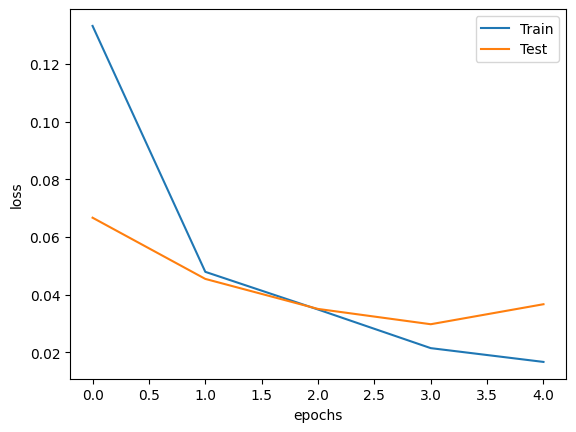

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
y_pred = (model.predict(X_test) >=0.5).astype(int)

 14/351 [>.............................] - ETA: 3:19

In [ ]:
accuracy_score(y_test, y_pred)

0.9884187082405346

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5866
           1       0.98      0.99      0.99      5359

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g', xticklabels = ['Fake','Real'] , yticklabels = ['Fake','Real'])

In [ ]:
x = ['this is a test news']

In [ ]:
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)


In [ ]:
(model.predict(x) >=0.5).astype(int)

**Manual Testing**

In [ ]:
str = ['Twitter Blue accounts fuel Ukraine War misinformation']

In [ ]:
str = tokenizer.texts_to_sequences(str)
str = pad_sequences(str, maxlen=maxlen)
result = (model.predict(str) >=0.5).astype(int)

In [ ]:
value = result[0][0]
if value == 1:
  print("True news")
else:
  print("Fake news")